## Install AWS API Client

In [11]:
!pip install --upgrade boto3


Requirement already up-to-date: boto3 in /Users/vicrojo/opt/anaconda3/lib/python3.8/site-packages (1.17.23)


## Import libraries

In [12]:
import boto3
import json
from io import BytesIO

from IPython.display import display
from PIL import ImageDraw, Image
from trp import Document

#create a S3 Client
s3 = boto3.client('s3')
#create a Textract Client
textract = boto3.client('textract')


## Show the File to Analyze

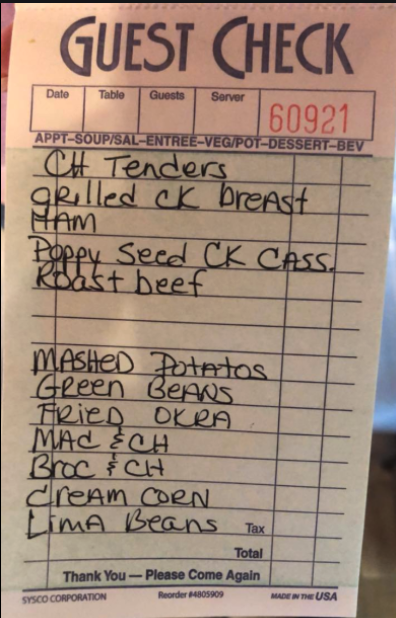

In [13]:
#Set PDF File location
input_file_location = "./"
input_file_name = "samplelist.png"

with open(input_file_location + input_file_name, 'rb') as document:
    filedata = bytearray(document.read())

img = Image.open(BytesIO(filedata))      

display(img) 

## Analyze the image
## Show the time consumed by each API

In [14]:
response_ocr = None

# Analyze the PNG Page using AnalyzeExpense API
%time textract_response = textract.analyze_document(Document={'Bytes': filedata},FeatureTypes=["FORMS", "TABLES"])
response_ocr = Document(textract_response)

CPU times: user 23.2 ms, sys: 4.54 ms, total: 27.8 ms
Wall time: 3.83 s


## <span style="color:green">Handwritten Results</span>

In [15]:
#Print the Textract OCR + FORMS + TABLES results
for page in response_ocr.pages:
    print("\n..:::OCR Results::::..\n")    
    print(page.getTextInReadingOrder())


    print("\n..:::Forms Results::::..\n")
    for field in page.form.fields:
        if (str(field.value).strip() != 'NOT_SELECTED' and str(field.value).strip() != 'None'):
            print("Key: {}, {}".format(field.key, field.value))        

    print("\n..:::Table Results::::..\n")
    value = ''
    for table in page.tables:
        print ("Table Found" + "\n\n")
        for r, row in enumerate(table.rows):            
            for c, cell in enumerate(row.cells):
                value += cell.text + " "
                # print("Table[{}][{}] = {}".format(r, c, cell.text))
            print (value + "\n\n")
            value = ''


..:::OCR Results::::..

GUEST CHECK
Table
Guests
Server
60921
APPT-SOUP/SAL-ENTREE-VEG/POT-DESSERT-BEV
CH Tenders
grilled CK breast
HAM
Seed CK CASS
Roast beef
MASHED Potatos
GReen BEANS
FRieD OKRA
MAd ECH
Broc FCH
cream CORN
LimA Beans
Tax
Total
Thank You - Please Come Again
SYSCO CORPORATION
Reorder #4805909
MADE - THE
USA
Date


..:::Forms Results::::..


..:::Table Results::::..

Table Found


 CH Tenders    


 grilled CK breast    


 HAM    


 Seed CK  CASS   


 Roast beef    


    


    


 MASHED Potatos    


 GReen BEANS    


 FRieD OKRA    


 MAd ECH    


 Broc FCH    


 cream CORN    


 LimA Beans Tax    


 Total    


 Thank You - Please Come Again    


